In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
%matplotlib notebook

In [2]:
def fourier_complex_to_real(complex_coeffs, N):
    """
    Converts complex-valued Fourier coefficients (of 
    real-valued data) to the associated amplitudes and 
    phase-shifts of the real-valued sinusoids
    
    Parameters
    ----------
    complex_coeffs : numpy.ndarray, shape-(N//2 + 1,)
        The complex valued Fourier coefficients for k=0, 1, ...
    
    N : int
        The number of samples that the DFT was performed on.
    
    Returns
    -------
    Tuple[numpy.ndarray, numpy.ndarray]
        (amplitudes, phase-shifts)
        Two real-valued, shape-(N//2 + 1,) arrays
    """
    amplitudes = np.abs(complex_coeffs) / N

    # |a_k| = 2 |c_k| / N for all k except for
    # k=0 and k=N/2 (only if N is even)
    # where |a_k| = |c_k| / N
    amplitudes[1 : (-1 if N % 2 == 0 else None)] *= 2

    phases = np.arctan2(-complex_coeffs.imag, complex_coeffs.real)
    return amplitudes, phases

<IPython.core.display.Javascript object>


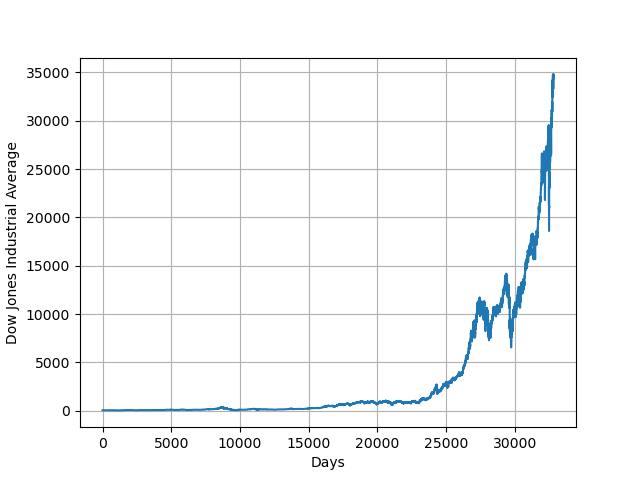

Text(0, 0.5, 'Dow Jones Industrial Average')

In [3]:
with open(r"C:\Users\g_bab\Downloads\djia.txt") as R:
    data = np.asarray([float(i) for i in R])

fig, ax = plt.subplots()
ax.plot(data)
ax.grid()
ax.set_xlabel("Days")
ax.set_ylabel("Dow Jones Industrial Average")

In [4]:
def pressure(times: np.ndarray, *, amp: float, frequencies: float) -> np.ndarray:
    """Describes the temporal waveform of a pure tone impinging on a 
    microphone at times `times` (an array of times). The wave has 
    an amplitude `amp`, measured in Pascals, and a frequency 
    `freq`, measured in Hz.
    
    Parameters
    ----------
    times : numpy.ndarray, shape=(N,)
        The times at which we want to evaluate the sound wave
    
    amp : float
        The wave's amplitude (measured in Pascals - force per unit area)
    
    freq : float
        The wave's frequency (measured in Hz - oscillations per second)
    
    Returns
    -------
    numpy.ndarray, shape=(N,)
        The pressure at the microphone at times `t`

    Notes
    -----
    We only care about the wave at a fixed location, at the microphone, 
    which is why we do not have any spatial component to our wave. 
    """
    final_list = []
    for freq in frequencies:
        final =list((amp * np.sin(2 * np.pi * freq * times)))
        final_list+=final
    final_array = np.array(final_list)
    return final_array

In [14]:
amplitude = 0.01  # Pascals
duration = 0.07 # seconds
sampling_rate = 44100 # Hz
n_samples = int(duration * sampling_rate) + 1
times = np.arange(n_samples) / sampling_rate

32816


<IPython.core.display.Javascript object>


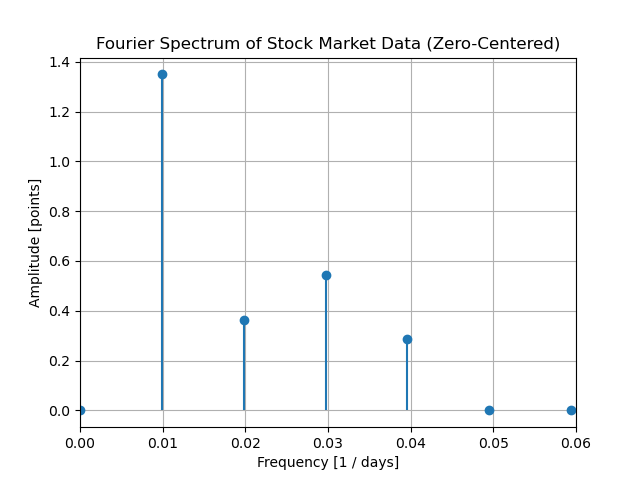

[297.029702970297, 99.00990099009901, 99.00990099009901, 99.00990099009901, 99.00990099009901, 198.01980198019803, 99.00990099009901, 99.00990099009901, 99.00990099009901, 99.00990099009901, 99.00990099009901, 99.00990099009901, 99.00990099009901, 99.00990099009901, 99.00990099009901, 99.00990099009901, 99.00990099009901, 99.00990099009901, 198.01980198019803, 99.00990099009901]


In [25]:
N = len(data)
print(N)
group_size = 100

list_freqs = []

for group_cnt in range(0, N//group_size):         #group the data, to find the most prevalent frequencies in each group
    
    group = data[(group_cnt * group_size):((group_cnt + 1) * group_size)]
    T = len(group) + 1
    ck = np.fft.rfft(group - group.mean())        #0 center to get rid of false initial peak at freq 0
    ck[round(0.1 * len(ck)) :] = 0                # set all coefficients past the first 10% to 0, smooths out the curve a little - not necessary though
    freqs = np.arange(len(ck)) / T                # frequency in 1 / days
    amps, phases = fourier_complex_to_real(ck, N=len(group))
    max_index = np.argmax(amps)    
    to_append = freqs[max_index]*10000            #scaling frequency up to be audible
    list_freqs.append(to_append)  
    
    if group_cnt == 1:                            #example fourier spectrum for the second batch - we can see that 0.01 is prominent
        fig, ax = plt.subplots()
        ax.stem(freqs[:10000], amps[:10000], basefmt=" ", use_line_collection=True)
        ax.set_xlabel("Frequency [1 / days]")
        ax.set_ylabel("Amplitude [points]")
        ax.set_title("Fourier Spectrum of Stock Market Data (Zero-Centered)")
        ax.set_xlim(0, 0.060)
        ax.grid(True)
    
print(list_freqs[:20])

In [19]:
final = pressure(times, amp = amplitude, frequencies = list_freqs)
Audio(final, rate=sampling_rate)